# Prepare dataset

## Import libraries and iris_dirty_csv

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls

Iris.ipynb
Lab | Making predictions with logistic regression.ipynb
iris_dirty.csv


In [3]:
df = pd.read_csv('iris_dirty.csv', 
                names=['sepal_length', 
                      'sepal_width',
                      'petal_length',
                      'petal_width',
                      'class'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length
count,151.000000,150.000000,151.000000
mean,6.196689,3.057333,3.764901
std,4.324325,0.432776,1.760197
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,58.000000,4.400000,6.900000


In [7]:
round(df.describe(), 2)

,sepal_length,sepal_width,petal_length
count,151.00,150.00,151.00
mean,6.20,3.06,3.76
std,4.32,0.43,1.76
min,4.30,2.00,1.00
25%,5.10,2.80,1.60
50%,5.80,3.00,4.40
75%,6.40,3.30,5.10
max,58.00,4.40,6.90


# ERD

### NaN

In [8]:
df.isna().sum()

sepal_length    0
sepal_width     1
petal_length    0
petal_width     0
class           0
dtype: int64

In [9]:
# locating in which row is the NaN for sepal_width
df[df['sepal_width'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,class
82,5.8,NaN,3.9,12 mm,Iris-versicolor


In [10]:

df['sepal_width'] = df['sepal_width'].fillna(df['sepal_width'].mean())

### Exploring petal_width 

In [11]:
df['petal_width'].value_counts()

2 mm     28
13 mm    13
18 mm    12
15 mm    12
14 mm     9
23 mm     8
3 mm      7
4 mm      7
10 mm     7
20 mm     6
21 mm     6
1 mm      6
12 mm     5
19 mm     5
16 mm     4
24 mm     3
11 mm     3
25 mm     3
22 mm     3
17 mm     2
5 mm      1
6 mm      1
Name: petal_width, dtype: int64

In [12]:
df['petal_width'].apply(lambda x: float(x.replace('mm',''))/10)

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
146    2.3
147    1.9
148    2.0
149    2.3
150    1.8
Name: petal_width, Length: 151, dtype: float64

In [13]:
df['petal_width'] = df['petal_width'].apply(lambda x: float(x.replace('mm',''))/10)

In [14]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
round(df.describe(),2)

,sepal_length,sepal_width,petal_length,petal_width
count,151.00,151.00,151.00,151.00
mean,6.20,3.06,3.76,1.20
std,4.32,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.40,1.30
75%,6.40,3.30,5.10,1.80
max,58.00,4.40,6.90,2.50


<AxesSubplot:>

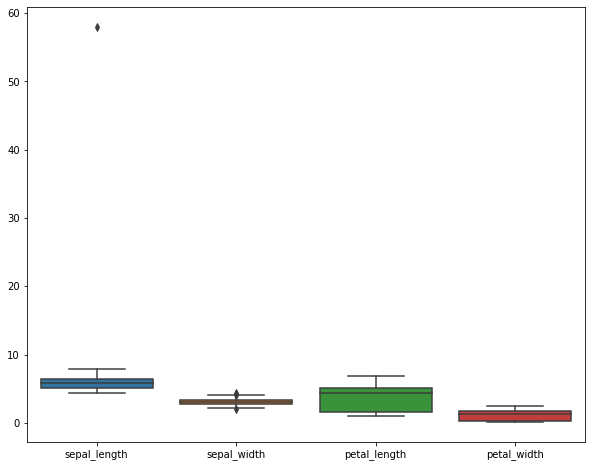

In [16]:
plt.figure(figsize = (10, 8))
sns.boxplot(data=df)

In [17]:
df[df['sepal_length']>50]

,sepal_length,sepal_width,petal_length,petal_width,class
143,58.0,2.7,5.1,1.9,Iris-virginica


In [18]:
# there is probably an error with the decimal

In [19]:
corrected_value = df[df['sepal_length']>50]['sepal_length']/10

In [20]:
df.loc[143,'sepal_length'] = float(corrected_value)

<AxesSubplot:>

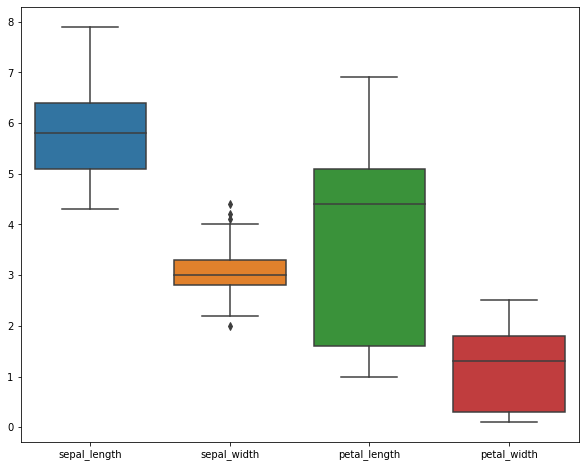

In [21]:
plt.figure(figsize = (10, 8))
sns.boxplot(data=df)

In [22]:
df['class'].value_counts()

Iris-versicolor    51
Iris-virginica     50
Iris-setosa        49
Iris-setsoa         1
Name: class, dtype: int64

In [23]:
df['class'].apply(
    lambda x: 'Iris-setosa' 
    if x == 'Iris-setsoa'
    else x)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: class, Length: 151, dtype: object

# plotting the data

/Users/vonate/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/vonate/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


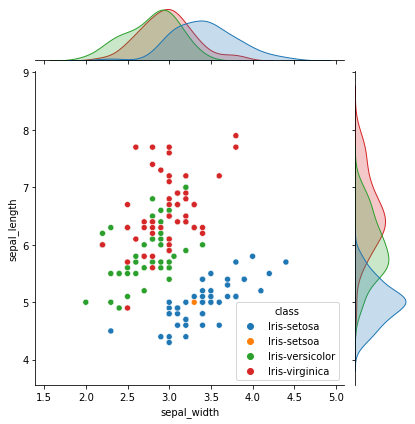

In [24]:
sns.jointplot(data=df, x='sepal_width', y= 'sepal_length', hue='class')

/Users/vonate/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/vonate/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/vonate/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/vonate/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


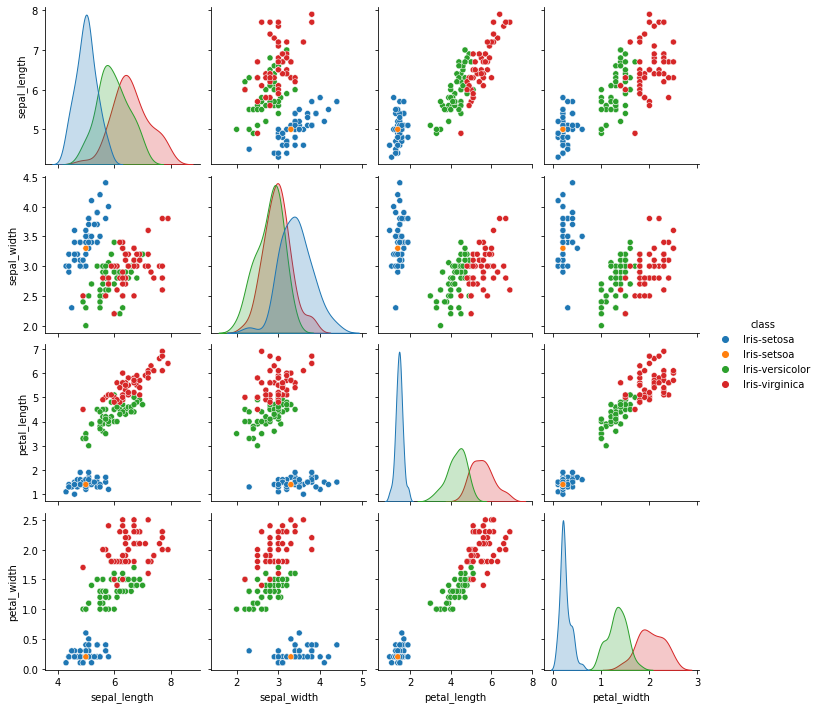

In [25]:
sns.pairplot(df, hue='class')

# Correlations 

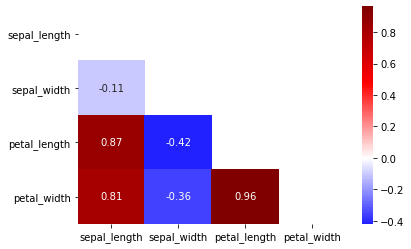

In [26]:
mask = np.zeros_like(df.drop('class', axis=1).corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df.drop('class', axis=1).corr(),
           annot=True,
           center=0,
           mask=mask,
           cmap='seismic')
plt.show();


# Modelling with logistic regression 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [28]:
lr = LogisticRegression(max_iter=400)

In [29]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
X = df.drop('class', axis=1)

In [31]:
y = df['class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=30)

In [33]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [34]:
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9347826086956522

# Explore the accuracy score for predictions 

In [35]:
def get_score(test_size, df):
    X = df.drop('class', axis=1)
    y= df['class']
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       test_size = test_size,
                                                       random_state=30)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [36]:
np.linspace(0.1, 0.9, num=17)

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ])

In [37]:
test_sizes = np.linspace(0.1, 0.9, num=17)

In [38]:
acc_scores = [get_score(test_size, df) for test_size in test_sizes]

Text(0, 0.5, 'accuracy_score')

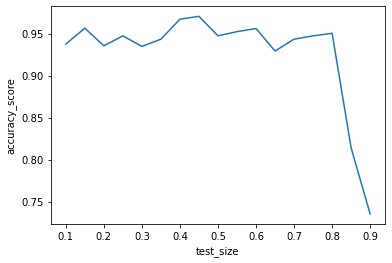

In [39]:
plt.plot(test_sizes, acc_scores)
plt.xlabel('test_size')
plt.ylabel('accuracy_score')

## Predicting using our test features and checking with confusion matrix

In [40]:
y_pred = lr.predict(X_test)

In [41]:
# confusion matrix

cnfmat = confusion_matrix(y_test, y_pred)

In [42]:
# setting up a dataframe for confussion matrix

df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test), 
                     index=np.unique(y_test))

In [43]:
df_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,13,0,0
Iris-versicolor,1,6,7
Iris-virginica,0,0,19


<AxesSubplot:xlabel='Predicted label', ylabel='True label'>

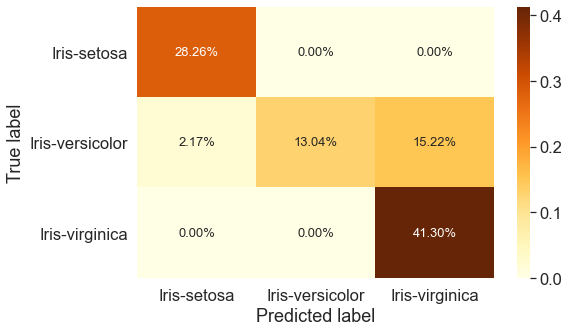

In [44]:
# set the names of the axis for the confusion matrix
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'
# setting the fontsize of the plot
sns.set(font_scale=1.5)
#setting the plot size
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='YlOrBr',
            annot_kws = {'size':13})

### Bonus

In [45]:
df_p = df.copy()

In [46]:
df_p['class'] = lr.predict(df.drop('class', axis=1))

In [49]:
df['class'].value_counts()

Iris-versicolor    51
Iris-virginica     50
Iris-setosa        49
Iris-setsoa         1
Name: class, dtype: int64

In [50]:
df_p['class'].value_counts()

Iris-virginica     84
Iris-setosa        52
Iris-versicolor    15
Name: class, dtype: int64

In [53]:
accuracy_score(y_test, y_pred)

0.8260869565217391